In [1]:
import geopandas
import pandas as pd

# read in blocks shapefile
bg = geopandas.read_file("C:/Users/madie/OneDrive/data/ipums/va_bg_2018_pop/va_bg_2018_pop.shp")
# read in precincts shapefile
precincts = geopandas.read_file("C:/Users/madie/OneDrive/data/vest/va_2018_ushouse/va_2018_ushouse.shp")

In [13]:
precincts = precincts.to_crs(epsg=2283)
bg = bg.to_crs(epsg=2283)
# remove any bowties (little imperfections in the polygons)
precincts.geometry = precincts.buffer(0)
bg.geometry = bg.buffer(0)

precincts = precincts.reset_index(drop = True)
bg = bg.reset_index(drop = True)

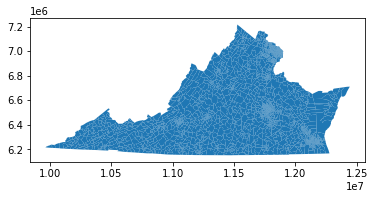

In [14]:
precincts.plot()

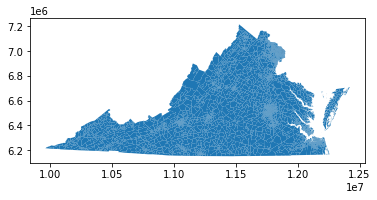

In [15]:
bg.plot()

In [11]:
import maup
maup.progress.enabled = True
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)

In [16]:
columns = ["pop"]

# Include area_cutoff=0 to ignore any intersections with no area,
# like boundary intersections, which we do not want to include in
# our proration.
pieces = maup.intersections(bg, precincts, area_cutoff=0)

100%|██████████████████████████████████████████████████████████████████████████████| 2463/2463 [00:42<00:00, 58.58it/s]


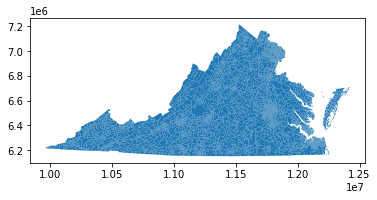

In [17]:
pieces.plot()

In [18]:
# Weight by prorated population from bg
weights = bg["pop"].groupby(maup.assign(bg, pieces)).sum()
# Normalize the weights so that votes are allocated according to their
# share of population in the old_precincts
weights = maup.normalize(weights, level=0)

100%|████████████████████████████████████████████████████████████████████████████| 21503/21503 [09:17<00:00, 38.55it/s]


In [19]:
# Use blocks to estimate population of each piece
precincts[columns] = maup.prorate(
    pieces,
    bg[columns],
    weights=weights
)
precincts[columns].head()

,pop
0,220.0
1,0.0
2,0.0
3,0.0
4,0.0


In [23]:
print(precincts['pop'])

0       220.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
2458    300.0
2459    550.0
2460    230.0
2461      0.0
2462    150.0
Name: pop, Length: 2463, dtype: float64


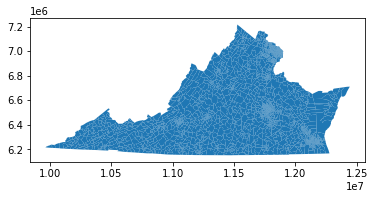

In [25]:
precincts.plot()

In [26]:
precincts.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,CON_DIST,G18HORDEM,G18HORREP,G18HORLIB,G18HORWRI,geometry,pop
0,001,Accomack County,000101,Chincoteague,2,533,1039,0,1,"POLYGON Z ((12370063.644 6661341.644 0.000, 12...",220.0
1,001,Accomack County,000201,Atlantic,2,171,482,0,2,"POLYGON Z ((12319939.723 6651354.425 0.000, 12...",0.0
2,001,Accomack County,000202,Greenbackville,2,307,595,0,1,"POLYGON Z ((12348275.656 6673222.628 0.000, 12...",0.0
3,001,Accomack County,000301,New Church,2,583,490,0,0,"POLYGON Z ((12304918.630 6669238.329 0.000, 12...",0.0
4,001,Accomack County,000401,Bloxom,2,118,286,0,0,"POLYGON Z ((12286550.849 6649769.089 0.000, 12...",0.0


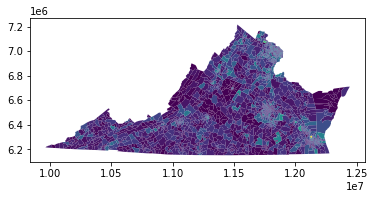

In [27]:
precincts.plot(column='pop')

In [28]:
old_precincts = geopandas.read_file("C:/Users/madie/OneDrive/data/pre-redist/VA_precinct_2018/VA_precinct_2018.shp")

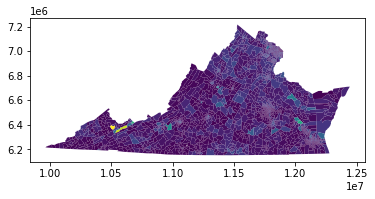

In [29]:
old_precincts.plot(column='pop')

In [33]:
precincts['pop'].isnull().values.any()

False

In [34]:
precincts.to_file("C:/Users/madie/OneDrive/data/pre-redist/VA_precinct_2018_nonan/VA_precinct_2018_nonan.shp")